In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

**Data Description**

For our project, we'll be working with a dataset compiled by The Toronto Star, a daily newspaper in Toronto, Canada. This dataset includes 5226 rows of entries on arrests for possession of small quantities of marijuana made between 1997 and 2002. The dataset include information on demographics like the race, sex, and previous arrest count of the person. In the table below, we can examine all of the columns. Colour (race), year, age, and sex are self-explanatory. Released refers to whether or not the person was released; employed, whether the person was employed at the time of their arrest; citizen, whether the person was a citizen; and checks, the number of previous arrests, convictions, and parole statuses on which the person was recorded. 

This dataset is only a subset of a larger collection of data collected by The Star, who collected data even beyond 2002 through 2013. In 2017, The Star published [an article](https://www.thestar.com/news/insight/2017/07/07/27000-torontonians-were-arrested-for-marijuana-possession-in-a-decade-what-will-happen-to-them.html) highlighting the disproportionate number of Black people who were arrested between 2003 and 2013. Unfortunately, this larger dataset is not available to the public; nonetheless, we hope to work with the older set of data to reveal trends between an individual's race, gender, and age and their criminal history.

With a journalistic organization behind this data collection, we have more faith in the accuracy of the data. A nonpartisan organization like a newspaper is motivated by the sheer collection and parsing of information — for this reason, we tend to trust that the data provided is as comprehensive as possible given their means. 

Beyond The Star's article, however, there isn't much background information on the particular subset of data we intend to examine. A lot of Googling has revealed little beyond minimal information clarifying the meanings of the column names. One interesting tidbit we uncovered is that when someone is arrested for small-quantity marijuana possession for the *first* time, they often walk away with an unconditional release or a donation to charity. This is one thing to keep in mind when evaluating this dataset — unlike in the U.S., where marijuana possession is a serious federal offence that can lead to many years of imprisonment.

In [2]:
Arrests = pd.read_csv("Arrests.csv")
Arrests = Arrests.drop("Unnamed: 0", axis = 1)

The raw dataset includes a few non-numeric variables: "released", "employed", "citizen", and race. Because all of these variables are binary, it is easy to convert them into numerical values (0 and 1) in order to make analysis easier. In the cleaned data, 1/0 corresponds to Yes/No for the first three variables and White/Black for race.

In [3]:
#Coding qualitative data
Catcolumns = ["released", 'employed', 'citizen']
for Column in Catcolumns:
    Arrests[Column] = Arrests[Column].map(dict(Yes=1, No=0))
Arrests["colour"] = Arrests["colour"].map(dict(White=1, Black=0))

In [4]:
Arrests.head()

,released,colour,year,age,sex,employed,citizen,checks
0,1,1,2002,21,Male,1,1,3
1,0,0,1999,17,Male,1,1,3
2,1,1,2000,24,Male,1,1,3
3,0,0,2000,46,Male,1,1,1
4,1,0,1999,27,Female,1,1,1


**Potential Discrepancies**

The primary speed bump we noticed when looking through this data was that there seemed to be far fewer arrests in 2002. At first glance, this might suggest that in 2002 a legal change or something else in the environment changed criminal policies for marijuana possession; however, it may be more reasonable to assume that the data is simply incomplete. This could be a result of the data collectors stopping collection mid-2002. This is the most likely reason, as our background research revealed that the rest of the data collected by The Star started in 2003, suggesting there may have been a gap in collection between 2002 and 2003. This could potentially cause trouble if we were to conduct an analysis by year. However, since our questions is more focused on the trends between demographic factors and not progress over time, this gap in data probably won't impact us to much. 

Another flaw of this data is that it fails to have data on racial identites beyond White and Black. Although the demographic population of Toronto was not *super* diverse in the 2000s, White and Black people respectively represented roughly 50% and 8% of Toronto's population in the early 2000s. Toronto is also home to significant South Asian and Chinese groups as well. It's possible that arrests for people from these groups were excluded from the final dataset because of how few there were — historically, these groups have lower crime and arrest rates than White and Black populations, suggesting that there were so few marijuana-related arrests during this time period that the publishers chose to omit them.

**Data Analysis**

One of our primary goals in examining this dataset is to uncover relationships between race and criminal treatment. Is there an evidenced relationship between race and arrest? Furthermore, the story of an arrest does not begin nor end with the arrest — what about the person's treatment and life both before and after their arrest? This could be measured through variables like whether or not they were released and how many times they had been arrested previously (checks). To do this, we started by separating our dataset by race: one subset for White and one for Black arrestees.

In [5]:
ArrestsWhite = Arrests [ Arrests["colour"] == 1]
ArrestsBlack = Arrests [ Arrests["colour"] == 0]

In [6]:
whiteCount = ArrestsWhite.groupby(["year"]).count()
blackCount = ArrestsBlack.groupby(["year"]).count()

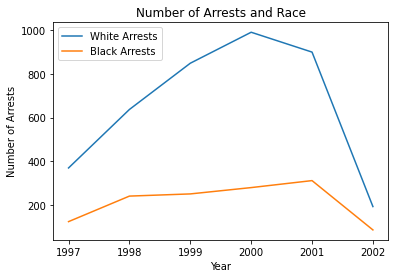

In [7]:
#Arrests by year for each race
plt.plot(whiteCount.index, whiteCount["released"], label = "White Arrests")
plt.plot(blackCount.index, blackCount["released"], Label = "Black Arrests")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.title("Number of Arrests and Race")
plt.legend()
plt.show()

In [8]:
print('Number of White arrests: ', len(ArrestsWhite))
print('Number of Black arrests: ', len(ArrestsBlack))

Number of White arrests:  3938
Number of Black arrests:  1288


We plotted the arrest data by year to make our graph more comprehensible. So far, there are just a couple of trends to notice. First, the data sharply drops off in 2002, most likely due to incomplete data gathered that year (as mentioned above in our data discrepancies analysis). There is also a generaly upward trend in total arrests between 1997 and 2000, likely due to changing policies or legal enforcement attitudes as awareness of marijuana abuse rose in the country. Finally, this graph makes it apparent that the number of White arrests is much higher than Black arrests. As we see computed above, Black people make up less than a third of total arrests. Before we can jump to any conclusions about race and arrest likelihood, however, we must remember to consider this proportion in the context of Toronto's population's racial demographics. As we discussed above, only 8% of Toronto's population in this time period was Black. That means that Black people are getting arrested at a rate disproportionate to their frequency in the population.

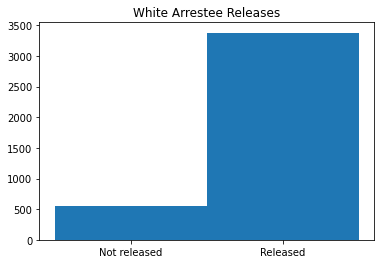

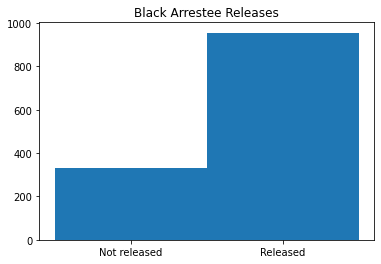

In [9]:
#Figure 1: Release ratio by race
plt.hist(ArrestsWhite['released'], bins = 2)
plt.xticks(ticks = [0.25,0.75], labels = ["Not released", "Released"])
plt.title("White Arrestee Releases")
plt.show()
plt.hist(ArrestsBlack['released'], bins = 2)
plt.xticks(ticks = [0.25,0.75], labels = ["Not released", "Released"])
plt.title("Black Arrestee Releases")
plt.show()

We plotted histograms *(Figure 1)* of release frequencies in order to compare the two data subsets (White vs. Black arrestees). Right off the bat, we can see that Black arrestees have a larger ratio of not released to released, suggesting that Black people may be less likely to be released than White people. However, it's difficult to  draw a convincing conclusion on this just by examining histograms — this discrepancy could simply be due to the smaller sample size of Black arrestees. We decided to run some additional analyses to uncover the truth behind these differences.

In [10]:
whiteYearSum = ArrestsWhite.groupby(["year"]).sum()
blackYearSum = ArrestsBlack.groupby(["year"]).sum()

In [11]:
whiteYearSum["totinstance"] = whiteCount["age"]
blackYearSum["totinstance"] = blackCount["age"]
whiteYearSum["releasefrequency"] = (whiteYearSum["released"]/whiteYearSum["totinstance"])
blackYearSum["releasefrequency"] = (blackYearSum["released"]/blackYearSum["totinstance"])

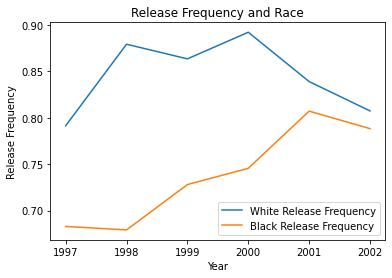

In [12]:
#Figure 2: Release frequency by year for each race
plt.plot(whiteYearSum.index, whiteYearSum["releasefrequency"], label = "White Release Frequency")
plt.plot(blackYearSum.index, blackYearSum["releasefrequency"], Label = "Black Release Frequency")
plt.xlabel("Year")
plt.ylabel("Release Frequency")
plt.title("Release Frequency and Race")
plt.legend()
plt.show()

In [13]:
race_model = LinearRegression().fit(Arrests[["colour"]], Arrests["released"])
print('Slope of race vs. release frequency: ', race_model.coef_)

Slope of race vs. release frequency:  [0.11659014]


We computed the release frequency of each race — that is, the proportion of released to not-released within each subset — and graphed the frequencies for each race by year. It's clear that White arrestees had much higher frequences of release than Black arrestees, every single year. Like our histograms above, this suggests a relationship between race and legal outcomes. We ran one more analysis to confirm this finding. Running a linear regression model comparing the relationship between race and release status results in an positive slope of roughly 0.12, supporting our guess that White people are more likely than Black people to be released. 

We'll have to dig deeper to find out if our preliminary hypothesis — that Black people are treated more harshly than White people in this dataset — continues to hold up. Next we'll try to examine a bigger picture: the relationship between race, checks (the number of times this person has been arrested previously — not necessarily for marijuana-related charges), and release status. 

In [14]:
check_model = LinearRegression().fit(Arrests[["colour"]], Arrests["checks"])

In [18]:
print("Race vs. previous arrest history, slope: ", check_model.coef_)

Race vs. previous arrest history, slope:  [-0.61436111]


In [16]:
print(f'Mean # of Checks for Black Arrests: {ArrestsBlack["checks"].mean()}')
print(f'Mean # of Checks for White Arrests: {ArrestsWhite["checks"].mean()}')      

Mean # of Checks for Black Arrests: 2.099378881987578
Mean # of Checks for White Arrests: 1.485017775520569


Above, we see that there is a very strong negative relationship (slope of -0.61) between race and previous arrests. Since 0 corresponds to Black arrestees and 1 to White, this indicates that Black arrestees were more likely to have been arrested previously, once or more times. Examining the average number of checks for each race subset corroborates with this: Black arrestees had an average of 2 previous arrests, whereas White arrestees had an average of roughly 1.5. Previously, we were able to find a coherent relationship between race and release status, and this new finding continues to corroborate with our hypothesis: Black people experience a higher rate of arrest than White people *overall*, not just in marijuana-related cases. 

In [17]:
checkrelease_model = LinearRegression().fit(Arrests[["checks"]], Arrests["released"])

In [19]:
print("Arrest history vs. release record, slope: ", checkrelease_model.coef_)

Arrest history vs. release record, slope:  [-0.06101365]


The model found a negative relationship between number of checks and release status. In other words, the more times someone has been previously arrested, the less likely they are to be released. This makes intuitive sense. According to this model, a person with 0 checks would have practically 100% chance of being released, while someone with 6 previous arrests would only have about a 64% chance of release. This finding will help us inform the rest of our analysis. This dataset includes many demographic variables beyond race, and we expect that several of them have additional influences on arrests. In the following analyses we will examine factors including age, citizenship, and employment and their effect on release status and criminal background. 

In [20]:
ageCount = Arrests.groupby(["age"]).count()
whiteAgeCount = ArrestsWhite.groupby(["age"]).count()
blackAgeCount = ArrestsBlack.groupby(["age"]).count()

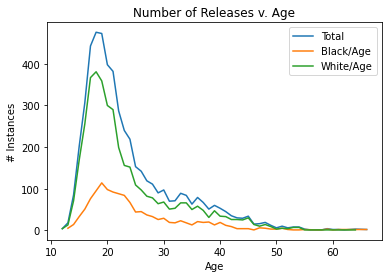

In [21]:
#Figure 3: Release records by age
plt.plot(ageCount.index, ageCount["released"], label = "Total")
plt.plot(blackAgeCount.index, blackAgeCount["released"], Label = "Black/Age")
plt.plot(whiteAgeCount.index, whiteAgeCount["released"], Label = "White/Age")
plt.xlabel("Age")
plt.ylabel("# Instances")
plt.title("Number of Releases v. Age")
plt.legend()
plt.show()

*Figure 3* is an illustration of releases by age. Here there aren't many differences in the trends between Black arrestees and White arrestees. Both follow the same pattern: younger arrestees have a much higher rate of release than older ones, and there is a sharp peak in the data around age 20. This corroborates with our former finding that fewer previous arrests lead to increased release likelihood — younger people are less likely to have been arrested previously on the count of simply not having as many years of life experience. 

In [23]:
#Counting gender breakdown
genderCount = Arrests.groupby(["sex"]).count()
maleCount = ArrestsWhite.groupby(["sex"]).count()
femaleCount = ArrestsBlack.groupby(["sex"]).count()
print(genderCount)

        released  colour  year   age  employed  citizen  checks
sex                                                            
Female       443     443   443   443       443      443     443
Male        4783    4783  4783  4783      4783     4783    4783


In [24]:
#Converting genders descriptors to binary variables
Arrests["sex"] = Arrests["sex"].map(dict(Male=1, Female=0))

In [25]:
#Calculating releases by gender
year_list = [1997,1998,1999,2000,2001,2002]
male_year_avg = []
female_year_avg = []
for year in year_list:
    male_r = 0
    male_u = 0
    female_r = 0
    female_u = 0
    for x in range(len(Arrests [ Arrests["year"] == year ])):
        if Arrests["sex"][x] == 1:
            if Arrests["released"][x] == 1:
                male_r += 1
            elif Arrests["released"][x] == 0:
                male_u += 1
        elif Arrests["sex"][x] == 0:
            if Arrests["released"][x] == 1:
                female_r += 1
            elif Arrests["released"][x] == 0:
                female_u += 1
    male_year_avg.append(male_r/(male_r+male_u))
    female_year_avg.append(female_r/(female_r+female_u))
                
    

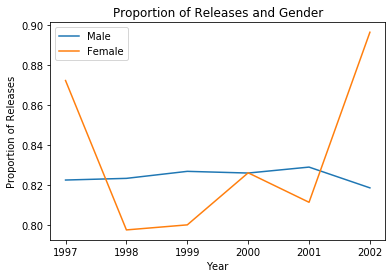

In [26]:
#Figure 4: Release rates by gender
plt.plot(year_list, male_year_avg, Label = "Male")
plt.plot(year_list, female_year_avg, Label = "Female")
plt.xlabel("Year")
plt.ylabel("Proportion of Releases")
plt.title("Proportion of Releases and Gender")
plt.legend()
plt.show()

Other than age, another factor to consider is the arrestee's gender. Was an arrestee more likely to be released if they were a certain gender? According to *Figure 4*, probably not. While the male data subset saw a highly stable proportion of release, the female subset swung around the male average. This pattern is likely due to the much smaller sample size of women. Of the 5226 entries in our dataset, only 443 were women — just ~8% of the total dataset. This may explain why the female proportion of release varies so much year by year, but remains close to the male proportion. The small sample size of women in the arrest data, however, *is* indicative of different genders' likelihood to get arrested. By nature roughly half of Toronto's population is female, yet only 8% of arrests in this dataset are female. It is a universally acccepted [fact](https://www.annualreviews.org/doi/abs/10.1146/annurev.soc.22.1.459) that a gender gap exists everywhere in the world, not just Toronto — men are simply much more likely than women to commit crimes. 

In [27]:
year_list = [1997,1998,1999,2000,2001,2002]
Citizen_avg = []
Noncitizen_avg = []
for year in year_list:
    citizen_r = 0
    citizen_u = 0
    noncitizen_r = 0
    noncitizen_u = 0
    for x in range(len(Arrests [ Arrests["year"] == year ])):
        if Arrests["citizen"][x] == 1:
            if Arrests["released"][x] == 1:
                citizen_r += 1
            elif Arrests["released"][x] == 0:
                citizen_u += 1
        elif Arrests["citizen"][x] == 0:
            if Arrests["released"][x] == 1:
                noncitizen_r += 1
            elif Arrests["released"][x] == 0:
                noncitizen_u += 1
    Citizen_avg.append(citizen_r/(citizen_r+citizen_u))
    Noncitizen_avg.append(noncitizen_r/(noncitizen_r+noncitizen_u))

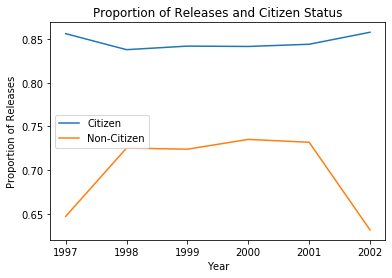

Overall average Citizen release proportion: 0.8465035856908472
Overall average Non-citizen release proportion: 0.6991222835857861


In [28]:
#Figure 5: Release rates by citizenship
plt.plot(year_list, Citizen_avg, Label = "Citizen")
plt.plot(year_list, Noncitizen_avg, Label = "Non-Citizen")
plt.xlabel("Year")
plt.ylabel("Proportion of Releases")
plt.title("Proportion of Releases and Citizen Status")
plt.legend()
plt.show()
print("Overall average Citizen release proportion:", np.mean(Citizen_avg))
print("Overall average Non-citizen release proportion:", np.mean(Noncitizen_avg))

Unlike gender, citizenship clearly plays an important role in whether or not an arrestee is released. There is a distinct difference in proportion of releases year-to-year between citizens and non-citizens. As computed above, the overall average (spanning 1997-2002) for citizen release rates is nearly 85%, whereas the release rate for non-citizens averages under 70%. This is a pretty notable difference, indicating that citizenship may play an important role in deciding an arrestee's legal treatment. This logically checks out: it makes sense that a country would give established citizens more privileges than non-citizens.

In [29]:
year_list = [1997,1998,1999,2000,2001,2002]
Employed_avg = []
Unemployed_avg = []
for year in year_list:
    employ_r = 0
    employ_u = 0
    unemploy_r = 0
    unemploy_u = 0
    for x in range(len(Arrests [ Arrests["year"] == year ])):
        if Arrests["employed"][x] == 1:
            if Arrests["released"][x] == 1:
                employ_r += 1
            elif Arrests["released"][x] == 0:
                employ_u += 1
        elif Arrests["employed"][x] == 0:
            if Arrests["released"][x] == 1:
                unemploy_r += 1
            elif Arrests["released"][x] == 0:
                unemploy_u += 1
    Employed_avg.append(employ_r/(employ_r+employ_u))
    Unemployed_avg.append(unemploy_r/(unemploy_r+unemploy_u))

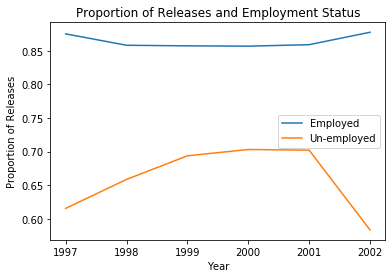

Overall average employed release proportion: 0.8641783108972855
Overall average unemployed release proportion: 0.6593523406840045


In [30]:
#Figure 6: Release rates by employment status
plt.plot(year_list, Employed_avg, Label = "Employed")
plt.plot(year_list, Unemployed_avg, Label = "Un-employed")
plt.xlabel("Year")
plt.ylabel("Proportion of Releases")
plt.title("Proportion of Releases and Employment Status")
plt.legend()
plt.show()
print("Overall average employed release proportion:", np.mean(Employed_avg))
print("Overall average unemployed release proportion:", np.mean(Unemployed_avg))

Similarly to citizenship, we find a pretty big difference in proportion of releases for people who were employed (at the time of their arrest) and people who were unemployed. Employed arrestees had much higher release rates than unemployed; according to our calculations, the difference in the two proportions was roughly 20%! This is also an unsurprising finding — employed people have already gone through various background checks and processes to acquire their job, and having income makes it less likely for them to commit crime. So, it makes sense that employed arrestees would be more likely to be released than unemployed ones.

So far, we have discovered that these two variables, citizenship and employment status, have a significant impact on whether or not the arrestee would be released. Now, we want to examine their interdependent effects.

In [63]:
citizenModel = LinearRegression().fit(Arrests[["citizen"]], Arrests["released"])
employedModel = LinearRegression().fit(Arrests[["employed"]], Arrests["released"])
print(f"Correlation Coefficent of Citizenship on Release: {employedModel.coef_}")
print(f"Correlation Coefficent of Employment on Releasee: {citizenModel.coef_}")

Correlation Coefficent of Citizenship on Release: [0.18091983]
Correlation Coefficent of Employment on Releasee: [0.12233009]


In [32]:
citizenEmployedModel = LinearRegression().fit(Arrests[["employed", "citizen"]], Arrests["released"])

In [64]:
print(f"Correlation Coefficent of Citizenship and Employment on Release: {citizenEmployedModel.coef_}")

Correlation Coefficent of Citizenship and Employment on Release: [0.17368778 0.10660583]


These models calculate the slopes of the individual relationships between a) citizenship and b) employment on release. The first two numbers describe the independent effect of each of these variables on release likelihood. Of these, the first is the relationship between citizenship and release status — it suggests a positive correlation between the two. In other words, it supports our previous estimate that being a citizen leads to an increased chance of release. Similarly, the second number suggests a positive (but less steep) relationship between employment and release status. Being employed independently increases the arrestee's chance of release, but not to a degree as large as citizenship can.

The last two numbers describe the codependent relationships each variable has on release rate. Now, we can observe the effects that each variable has on the other, as well as the cumulative effect on the arrestee's release status. When using both employment and citizenship as our predictors for release, the coefficents of both decrease which indicate that they are not independant variables, which is further confirmed by a positive correlation coefficent between employment and citizenship.

In [71]:
print(f'Correlation Matrix of Employment and Citizenship: \n {np.corrcoef(Arrests["employed"], Arrests["citizen"])}')

Correlation Matrix of Employment and Citizenship: 
 [[1.         0.07836839]
 [0.07836839 1.        ]]


Above, we calculated the correlation coefficient of three relationships: employment vs. citizenship, employment vs. release rate, and citizenship vs. release rate. The correlation coefficient helps us determine whether or not the relationship we found is linear – the closer to 1 its absolute value, the more linear the relationship. None of these relationships are particularly linear (the highest correlation coefficient of the three is 0.197, employment vs. release). Although disheartening, the nonlinear nature of these relationships is only to be expected — after all, all crime is a combination of many factors of the offender's lives, from the circumstances of their birth to the systematic factors that impact their whole lives. 

In [56]:
raceCitizenModel = LinearRegression().fit(Arrests[["colour"]], Arrests["citizen"])
print("Slope of Race vs. Citizenship: ", raceCitizenModel.coef_)
raceEmploymentModel = LinearRegression().fit(Arrests[["colour"]], Arrests["employed"])
print("Slope of Race vs. Employment: ", raceEmploymentModel.coef_)
print("Slope of Race vs. Released: ", race_model.coef_)

Slope of Race vs. Citizenship:  [0.18234774]
Slope of Race vs. Employment:  [0.10529709]
Slope of Race vs. Released:  [0.11659014]


Although none of the relationships we found are exactly linear, we can still be fairly confident about the positive relationship between citizenship, employment status, and release likelihood. But what about race? We calculated the relationships between race and citizenship as well as race and employment. Form our previous coefficient calculations, employment doesn't predict release rate as well as citizenship can, but the two coefficients are both higher than the one calculated by examining race vs. release. This suggests that both citizenship and employment are better predictors of release rate than race is. However, closer examination reveals the positive correlation of race with citizenship and employment — White people were more likely to be citizens *and* employed, making them subsequently more likely to be released.

In [58]:
def permuted_y(columnname):
    return np.random.permutation(Arrests[columnname].copy())

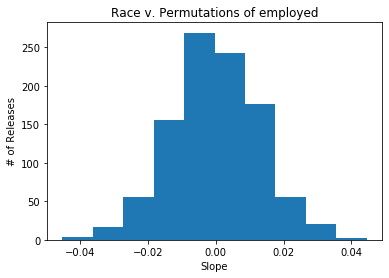

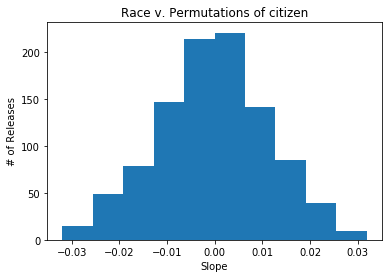

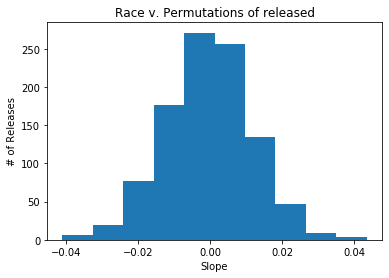

In [60]:
permColumnList = ["employed", "citizen", "released"]
for column in permColumnList:
    slopesyperm = np.zeros(1000)
    for slope in range(len(slopesyperm)):
        ytempslope = permuted_y(column)
        ymodel = LinearRegression().fit(Arrests[["colour"]], ytempslope)
        slopesyperm[slope] = ymodel.coef_
    plt.hist(slopesyperm)
    plt.xlabel("Slope")
    plt.ylabel("# of Releases")
    plt.title(f"Race v. Permutations of {column}")
    plt.show()

To test the significance of our results, we ran y-permutations to randomize the dataset of y-values. This allowed us to check whether our data were statistically significant or not — if many random permutations generated greater absolute values of slopes than ours, then the relationships we found may have simply been due to randomness of data. However, histograms of slopes calculated with random y-permutations resulted in maximum absolute values of around 0.03 and 0.04 — much lower than our slopes (which ranged between 0.11 and 0.18). Although the relationship isn't quite linear, we can remain confident that our slopes indicate some kind of trend.

**Conclusion**

Based on our analyses above, we have derived several conclusions regarding the relationships between an arrestee's demographics and their release status. First, we found that White arrestees were much likelier to be released than Black arrestees (when examining race as an independent variable) — a troubling finding that speaks to the underlying racism at work in the Canadian criminal justice system. Next, we discovered positive relationships between citizenship and employment to release rate, suggesting that arrestees who are established workers and citizens had much better chances of release than those who were not citizens or employed. However, the relationships between race and these variables are nuanced. We found that being Black results in lower chances of being employed or a citizen, both of which are deterministic factors in release decisions. Black people suffer from systematic oppression in many facets of their life, which have a cumulative effect on their wellbeing and chances of success. Our data analysis was able to uncover and attempt to quantify these various effects. In conclusion, we hope that this analysis has raised further questions about the different ways systematic racism can impact lives.

**Source Code:** [GitHub repository](https://github.com/chenganyi/2950-final)

**Acknowledgements** 

Thanks to Chloe Shores, who provided historical and sociological context on race and crime. 
Thanks to the Toronto Daily Star, whose data was used in this project. Thanks to Professor Mimno and our TAs for teaching us how to do this stuff.